In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import medfilt
from os.path import join
from correlate import norm_correlate
from scipy.interpolate import CubicSpline

with open('/Users/zachkeskinen/Documents/infrasound/data/eq_sigs.pkl', 'rb') as f:
    sigs = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zachkeskinen/Documents/infrasound/data/eq_sigs.pkl'

In [2]:
import seaborn as sns
sns.set(
        rc={
 'axes.axisbelow': True,
 'axes.edgecolor': 'grey',
 'axes.facecolor': 'None',
 'axes.grid': True,
 'axes.grid.axis':'y',
 'axes.labelcolor': 'black',
 'axes.linewidth': 1,
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'figure.figsize': (18, 12),
#  'font.family':'Arial',
 'grid.color': 'grey',
 'grid.alpha':1,
 'grid.linewidth':0.5,
 'image.aspect':'auto',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'savefig.dpi':300,
 'text.color': 'black',
 'xtick.bottom': False,
 'xtick.color': 'grey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'grey',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.color':'grey',
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":26,
                                "axes.labelsize":16})

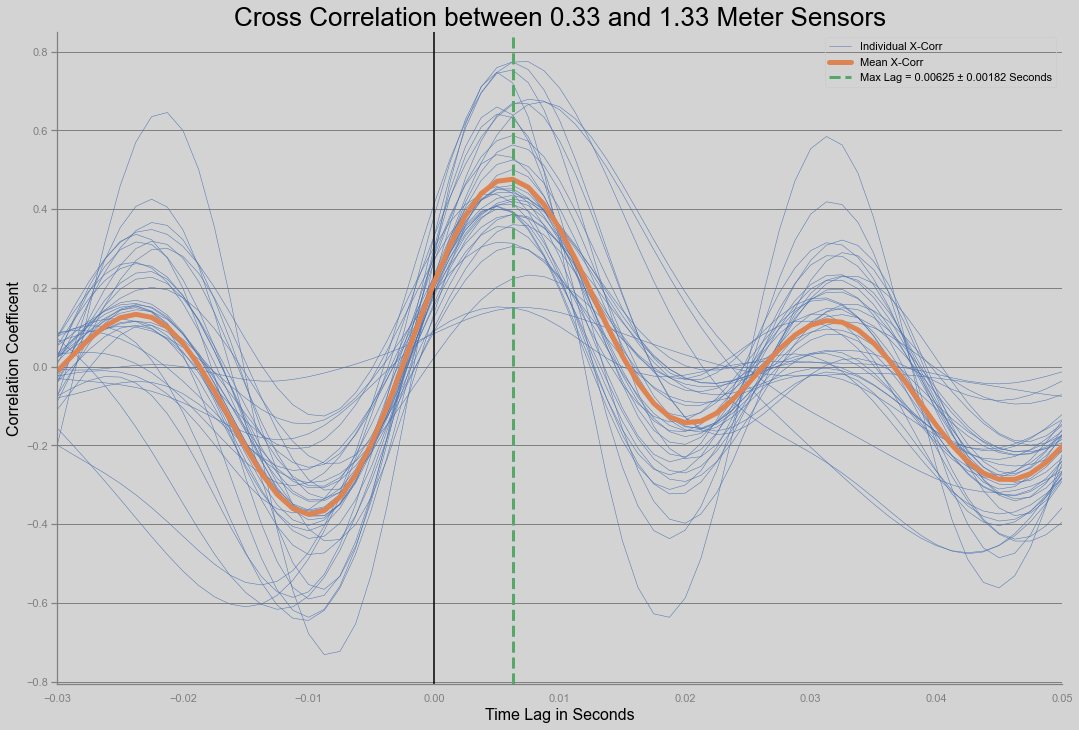

In [29]:
f, ax = plt.subplots()
csvalues = []
for i, t in enumerate(sigs.keys()):
    a = sigs[t][1.33].values.ravel()
    b = sigs[t][0.33].values.ravel()

    cs = CubicSpline(np.linspace(0, len(a), len(a)), a)
    cs_xs = np.linspace(0, len(a), 4*len(a))
    a_cs = cs(cs_xs)

    cs = CubicSpline(np.linspace(0, len(a), len(a)), b)
    b_cs = cs(cs_xs)

    c, l = norm_correlate(a_cs, b_cs)
    l = l/800

    csvalues.append(l[l>0][np.argmax(c[l>0])])
    if i == 0:
        corrs = c
        ax.plot(l, c, color = 'C0', label = 'Individual X-Corr', linewidth = 0.5)
    else:
        corrs = corrs + c
        ax.plot(l, c, color = 'C0', linewidth = 0.5)
ax.set_xlim(-0.03, 0.05)
ax.axvline(0, color = 'black')
ax.plot(l, corrs/(i+1), color = 'C1', linewidth = 5, label = 'Mean X-Corr')
plt.title('Cross Correlation between 0.33 and 1.33 Meter Sensors')
ax.set_xlabel('Time Lag in Seconds')
ax.set_ylabel('Correlation Coefficent')

max_lag = l[np.argmax(corrs)]
ax.axvline(max_lag, color = 'C2', linewidth = 3, label = f'Max Lag = {max_lag} ± {2*np.std(csvalues):.3} Seconds', linestyle = 'dashed')

ax.legend()
plt.savefig(join('/Users/zachkeskinen/Documents/infrasound/figures/speeds', 'xcorr033_133.png'))

# std dev 95% confidence interval for speed

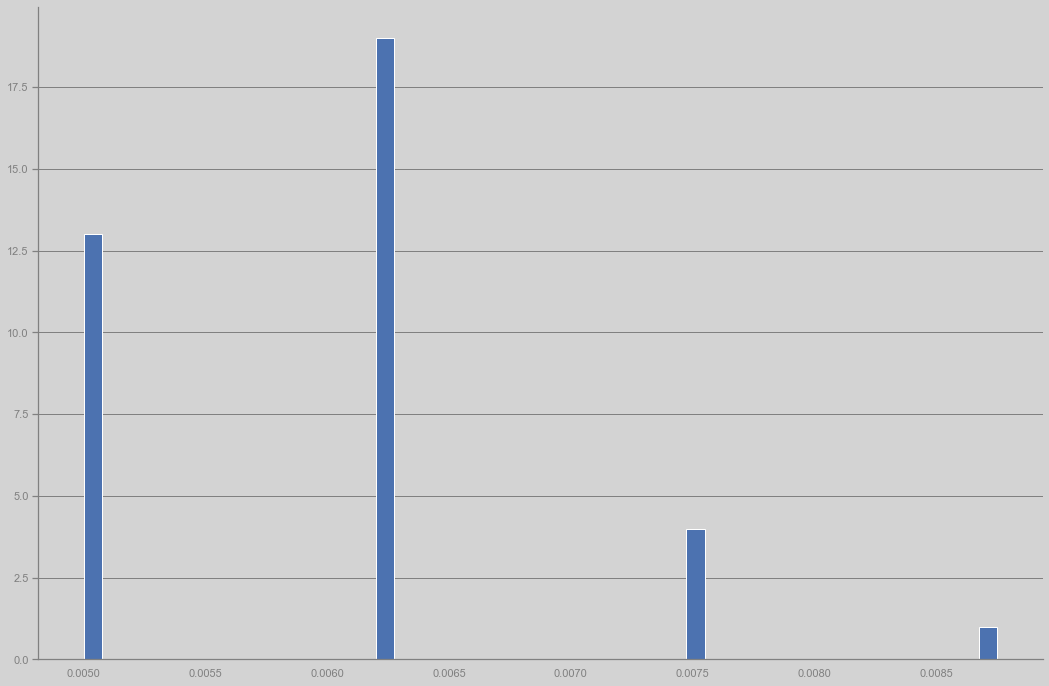

In [38]:
plt.hist(csvalues, bins = 50)
plt.show()

In [36]:
(1/ (max_lag - 2*np.std(csvalues)) - 1/ (max_lag + 2*np.std(csvalues)))/2

51.010868568539365

# bootstrap 95% confdience interval

In [40]:
from scipy.stats import bootstrap

In [48]:
data = (csvalues,)
low = bootstrap(data, statistic=np.mean, method = 'BCa').confidence_interval.low
high = bootstrap(data, statistic=np.mean, method = 'BCa').confidence_interval.high

In [57]:
1/low

175.14792899408283

In [58]:
1/high

159.13978494623655

In [59]:
(1/low - 1/high)/2

8.004072023923143